## Import of libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

## Dataset reading and DataFrame creation

In [2]:
data1 = pd.read_csv('athletes.csv', parse_dates = ['born_date', 'died_date'])
data2 = pd.read_csv('olympic_games_results.csv')
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

## DataFrame information visualization

In [3]:
print(df1.info())
print('-' * 80)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    145500 non-null  int64         
 1   name          145500 non-null  object        
 2   born_date     143693 non-null  datetime64[ns]
 3   born_city     110908 non-null  object        
 4   born_region   110908 non-null  object        
 5   born_country  110908 non-null  object        
 6   NOC           145499 non-null  object        
 7   height_cm     106651 non-null  float64       
 8   weight_kg     102070 non-null  float64       
 9   died_date     33940 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 11.1+ MB
None
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 10 columns)

In [4]:
# Visualizar columnas, tipo de datos y nulls de los datasets
df1.rename(columns={'NOC': 'noc'}, inplace=True)
# Tratamiento de datos
df1['noc'] = df1['noc'].astype('category')
valores_nulos = df1.isnull().sum()
print(valores_nulos)

athlete_id           0
name                 0
born_date         1807
born_city        34592
born_region      34592
born_country     34592
noc                  1
height_cm        38849
weight_kg        43430
died_date       111560
dtype: int64


# Dataset cleaning

## DataFrame 2 - DataType Modification

In [5]:
cols_to_convert = ['type', 'discipline', 'noc', 'medal'] # También se cabió el tipo de datos de la columna Team, tuvo que quitarse del código porque al eliminar la columna daba problemas a ejecutarlo
df2[cols_to_convert] = df2[cols_to_convert].astype('category')
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        304337 non-null  float64 
 1   type        304337 non-null  category
 2   discipline  304336 non-null  category
 3   event       304337 non-null  object  
 4   as          304337 non-null  object  
 5   athlete_id  304337 non-null  int64   
 6   noc         304336 non-null  category
 7   place       280359 non-null  float64 
 8   tied        304337 non-null  bool    
 9   medal       43631 non-null   category
dtypes: bool(1), category(4), float64(2), int64(1), object(2)
memory usage: 13.4+ MB
None


## Duplicates Visualization & Remove

In [6]:
# Duplicates
print("Visualization Before Remove")
print(f"{df1.duplicated().sum()} duplicates in df1")
print('-' * 80)
print(f"{df2.duplicated().sum()} duplicates in df2")
print('-' * 80)
print("VisualizationAfter Remove")
df2.drop_duplicates(inplace = True)
print(f"{df2.duplicated().sum()} duplicates in df2")

Visualization Before Remove
0 duplicates in df1
--------------------------------------------------------------------------------
23 duplicates in df2
--------------------------------------------------------------------------------
VisualizationAfter Remove
0 duplicates in df2


# Columns Information at DataFrame 2

In [7]:
#Mostrar eventos unicos
print("The unique value in event colum:")
print(len(df2['event'].unique()))
print('-' * 80)
#Mostrar registros con la palabra Olympic
print("Values of the event column with the word 'Olympic':")
print(df2[df2['event'].str.contains('Olympic', case=False)].shape[0])
print('-' * 80)
#Registros sin la palabra Olympic
print("Values of the event column without the word 'Olympic':")
print(df2[~df2['event'].str.contains('Olympic', case=False)].shape[0])
print('-' * 80)
#Mostrar cuantos Intercalated hay
print("Values of the event column with the word 'Intercalated':")
print(df2[df2['event'].str.contains('Intercalated', case=False)].shape[0])
print('-' * 80)
#Mostrar conteo de registros con Painting
print("Values of the event column with the word 'Painting':")
print(df2[df2['event'].str.contains('painting', case=False)].shape[0])
print('-' * 80)
#Mostrar conteo de registros con Open
print("Values of the event column with the word 'Open':")
print(df2[df2['event'].str.contains('open', case=False)].shape[0])
print('-' * 80)
#Mostrar conteo de registros sin Medallas
print("Values of the event column with the word 'Non-medal':")
print(df2[df2['event'].str.contains('non-medal', case=False)].shape[0])
print('-' * 80)
#Mostrar las fechas por orden
print("Dates ordered")
sorted_years = df2['year'].unique()
sorted_years.sort()
print(sorted_years)
print('-' * 80)
# Total histórico de atletas con medallas
filtro = df2[df2['medal'].isin(['Gold', 'Silver', 'Bronze'])]
print("Historical total of athletes with medals:")
print(len(filtro))

The unique value in event colum:
961
--------------------------------------------------------------------------------
Values of the event column with the word 'Olympic':
296898
--------------------------------------------------------------------------------
Values of the event column without the word 'Olympic':
7416
--------------------------------------------------------------------------------
Values of the event column with the word 'Intercalated':
0
--------------------------------------------------------------------------------
Values of the event column with the word 'Painting':
0
--------------------------------------------------------------------------------
Values of the event column with the word 'Open':
12280
--------------------------------------------------------------------------------
Values of the event column with the word 'Non-medal':
0
--------------------------------------------------------------------------------
Dates ordered
[1896. 1900. 1904. 1908. 1912. 1920. 1

## Unnecesary Values Elimination

In [8]:
# Eliminamos valores con non-medal
df2 = df2[~df2['event'].str.contains('non-medal', case=False)]
print(df2.info())
print('-' * 80)
print(df2[df2['event'].str.contains('non-medal', case=False)].shape[0])
print('-' * 80)
# Eliminamos valores con Intercalated
df2 = df2[~df2['event'].str.contains('Intercalated', case=False)]
print(df2.info())
print('-' * 80)
print(df2[df2['event'].str.contains('Intercalated', case=False)].shape[0])
print('-' * 80)
# Eliminamos valores con Painting
df2 = df2[~df2['event'].str.contains('Painting', case=False)]
print(df2.info())
print('-' * 80)
print(df2[df2['event'].str.contains('Painting', case=False)].shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 304314 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        304314 non-null  float64 
 1   type        304314 non-null  category
 2   discipline  304313 non-null  category
 3   event       304314 non-null  object  
 4   as          304314 non-null  object  
 5   athlete_id  304314 non-null  int64   
 6   noc         304313 non-null  category
 7   place       280355 non-null  float64 
 8   tied        304314 non-null  bool    
 9   medal       43630 non-null   category
dtypes: bool(1), category(4), float64(2), int64(1), object(2)
memory usage: 15.7+ MB
None
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 304314 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      N

## Data Visualization

In [9]:
#Buscar todos los eventos que no contengan Olympic
print("Values of the event column without the word 'Olympic':")
print(df2[~df2['event'].str.contains('Olympic', case=False)].shape[0])
print('-' * 80)
#Buscar todos los eventos que contengan YOG
print("Values of the event column with the word 'YOG':")
print(df2[df2['event'].str.contains('YOG', case=False)].shape[0])

Values of the event column without the word 'Olympic':
7416
--------------------------------------------------------------------------------
Values of the event column with the word 'YOG':
5842


## Data Filter

In [10]:
# Filtrar eventos que NO contienen 'Olympic', 'YOG', paréntesis y que tienen registros vacíos en 'place'
filtered_events = df2[
    ~df2['event'].str.contains('Olympic', case=False) & 
    ~df2['event'].str.contains('YOG', case=False) &
    ~df2['event'].str.contains(r'\(.*\)', regex=True) &  # Sin paréntesis
    df2['place'].isnull()  # Sin registros en 'place'
]

# Contar la frecuencia de cada evento que cumple con las condiciones
event_counts = filtered_events['event'].value_counts()

# Imprimir los resultados
print(event_counts)

filtered_events_2020 = filtered_events[filtered_events['year'] == 2020]

# Seleccionar las columnas 'event', 'year' y 'place'
results = filtered_events_2020[['event', 'year', 'place']]

# Imprimir los resultados
print(results)

event
Athletics            46
Modern Pentathlon    41
Fencing              26
Tug-Of-War           22
Shooting             19
Tennis               16
Wrestling            13
Weightlifting        10
Hockey                5
Art Competitions      5
Luge                  4
Rowing                3
Glíma                 3
Curling               2
Racquets              2
Boxing                2
Polo                  1
Golf                  1
Handball              1
Name: count, dtype: int64
Empty DataFrame
Columns: [event, year, place]
Index: []


## Duplicates Visualization & Remove

In [11]:
# Contar registros donde 'place' está vacío (nulo)
empty_place_count = df2['place'].isnull().sum()

# Imprimir el resultado
print(f"Number of records with empty 'place': {empty_place_count}")

print('-' * 80)
print(df2.isnull().sum())

Number of records with empty 'place': 23959
--------------------------------------------------------------------------------
year               0
type               0
discipline         1
event              0
as                 0
athlete_id         0
noc                1
place          23959
tied               0
medal         260684
dtype: int64


In [12]:
# Eliminar los registros mixed sports cuyo valor en place sea null
df2 = df2[~((df2['event'].str.contains('mixed sports', case=False)) & (df2['place'].isnull()))]

# Imprimir el número de registros restantes
print(f"Number of remaining records: {df2.shape[0]}")

Number of remaining records: 304314


## Data Visualization

In [13]:
# Conteo de disciplinas que nos queda al final para la segunda pregunta
valores_unicos = df2['discipline'].unique()
valores = valores_unicos.tolist()
print('-' * 80)
print(f"The unique value in dicipline column: {len(valores)}")

--------------------------------------------------------------------------------
The unique value in dicipline column: 87


In [14]:
# Count de participantes para la primera pregunta
valores_unicos = df2['athlete_id'].unique()
valores = valores_unicos.tolist()
print(f"The unique value in athlete_id column: {len(valores)}")

The unique value in athlete_id column: 144610


## Missing Values Removing

In [15]:
# Eliminar registros donde la columna 'year' tiene valores nulos
df2 = df2.dropna(subset=['year'])

# Verificar el tamaño del DataFrame después de la eliminación
print(f"Number of records without null values in the “year” column:")
print(len(df2))

print('-' * 80)
print(f"Review of null values:")
print(df2.isnull().sum())

Number of records without null values in the “year” column:
304314
--------------------------------------------------------------------------------
Review of null values:
year               0
type               0
discipline         1
event              0
as                 0
athlete_id         0
noc                1
place          23959
tied               0
medal         260684
dtype: int64


## DataType Modification

In [16]:
# Cambio de del tipo de dato de la columna year de float a int.
df2['year'] = df2['year'].astype(int)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 304314 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        304314 non-null  int64   
 1   type        304314 non-null  category
 2   discipline  304313 non-null  category
 3   event       304314 non-null  object  
 4   as          304314 non-null  object  
 5   athlete_id  304314 non-null  int64   
 6   noc         304313 non-null  category
 7   place       280355 non-null  float64 
 8   tied        304314 non-null  bool    
 9   medal       43630 non-null   category
dtypes: bool(1), category(4), float64(1), int64(2), object(2)
memory usage: 15.7+ MB
None


### Cleaned CSV Creation

In [17]:
#df1.to_csv('athlete_cleaned_lunes.csv', index=False, encoding='utf-8')

In [18]:
#df2.to_csv('olympic_cleaned_lunes.csv', index=False, encoding='utf-8')

## DataSets Unification & DataFrame Creation

In [19]:
#Unificación de datasets
# Seleccionar las columnas que deseas de cada DataFrame
df1_subset = df1[['athlete_id', 'name', 'height_cm', 'weight_kg' ]]
df2_subset = df2[['athlete_id','year', 'type', 'discipline','event','noc','place','medal']]

# Realizar el merge usando las columnas seleccionadas
df_unificado = pd.merge(df1_subset, df2_subset, on='athlete_id', how='inner')

# Mostrar el resultado
print(df_unificado)

        athlete_id                   name  height_cm  weight_kg  year    type  \
0                1  Jean-François Blanchy        NaN        NaN  1912  Summer   
1                1  Jean-François Blanchy        NaN        NaN  1912  Summer   
2                1  Jean-François Blanchy        NaN        NaN  1920  Summer   
3                1  Jean-François Blanchy        NaN        NaN  1920  Summer   
4                1  Jean-François Blanchy        NaN        NaN  1920  Summer   
...            ...                    ...        ...        ...   ...     ...   
304309      148983          Marián Skupek      196.0      108.0  2022  Winter   
304310      148984          Elsa Fermbäck        NaN        NaN  2022  Winter   
304311      148985          Hilma Lövblom        NaN        NaN  2022  Winter   
304312      148985          Hilma Lövblom        NaN        NaN  2022  Winter   
304313      148986   Charlotta Säfvenberg        NaN        NaN  2022  Winter   

                    discipl

In [20]:
#Creacion de un dataset unificado con culumnas de df1 y df2.
#df_unificado.to_csv('ds_unificado.csv', index=False, encoding='utf-8')

In [21]:
data3=pd.read_csv('ds_unificado.csv')
df3=pd.DataFrame(data3)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304314 entries, 0 to 304313
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  304314 non-null  int64  
 1   name        304314 non-null  object 
 2   height_cm   235783 non-null  float64
 3   weight_kg   226354 non-null  float64
 4   year        304314 non-null  int64  
 5   type        304314 non-null  object 
 6   discipline  304313 non-null  object 
 7   event       304314 non-null  object 
 8   noc         304313 non-null  object 
 9   place       280355 non-null  float64
 10  medal       43630 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 25.5+ MB


## Missing Values Removing

In [22]:
# Filtrar registros donde 'discipline' y 'noc' son nulos
filtro = df2[df2['discipline'].isnull() & df2['noc'].isnull()]

# Mostrar los nombres de la columna 'as' de esos registros
nombres_nulos = filtro['as']

# Mostrar los nombres
print(nombres_nulos)

304336    Charlotta Säfvenberg
Name: as, dtype: object


In [23]:
#Eliminacion de un registro 'extraviado' con valores nulos 

# Definir las condiciones de valores nulos en las columnas 'name' y 'sport'
condicion = df3['discipline'].isnull() & df3['noc'].isnull()

# Eliminar las filas que cumplen con ambas condiciones (valores nulos en 'name' y 'sport')
df_limpio = df3[~condicion]

# Mostrar el DataFrame después de eliminar las filas
print("\nDataFrame después de eliminar los registros con valores nulos en 'name' y 'sport':")
print(df_limpio.info())


DataFrame después de eliminar los registros con valores nulos en 'name' y 'sport':
<class 'pandas.core.frame.DataFrame'>
Index: 304313 entries, 0 to 304312
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  304313 non-null  int64  
 1   name        304313 non-null  object 
 2   height_cm   235783 non-null  float64
 3   weight_kg   226354 non-null  float64
 4   year        304313 non-null  int64  
 5   type        304313 non-null  object 
 6   discipline  304313 non-null  object 
 7   event       304313 non-null  object 
 8   noc         304313 non-null  object 
 9   place       280354 non-null  float64
 10  medal       43630 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 27.9+ MB
None


## DataType Modification

In [24]:
cols_to_convert = ['type', 'discipline', 'noc', 'medal'] # También se cabió el tipo de datos de la columna Team, tuvo que quitarse del código porque al eliminar la columna daba problemas a ejecutarlo
df3[cols_to_convert] = df3[cols_to_convert].astype('category')
#df2['place'] = df2['place'].astype(int)
#print(df3['noc'].unique())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304314 entries, 0 to 304313
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   athlete_id  304314 non-null  int64   
 1   name        304314 non-null  object  
 2   height_cm   235783 non-null  float64 
 3   weight_kg   226354 non-null  float64 
 4   year        304314 non-null  int64   
 5   type        304314 non-null  category
 6   discipline  304313 non-null  category
 7   event       304314 non-null  object  
 8   noc         304313 non-null  category
 9   place       280355 non-null  float64 
 10  medal       43630 non-null   category
dtypes: category(4), float64(3), int64(2), object(2)
memory usage: 17.7+ MB
None


# Analysis#1 - Country Representation

In [25]:
# Iteracion 1 ----- Participacion historica por paises

# Agrupar por la columna 'noc' y contar los valores únicos de 'athlete_id'
df_grouped = df3.groupby('noc')['athlete_id'].nunique().reset_index()

# Renombrar la columna para mayor claridad
df_grouped.rename(columns={'athlete_id': 'unique_athletes'}, inplace=True)

# Ordenar los resultados por la cantidad de atletas (de mayor a menor)
df_grouped_sorted = df_grouped.sort_values(by='unique_athletes', ascending=False)

# Mostrar el resultado
print("\nNúmero de atletas distintos por país:")
print(df_grouped_sorted)
print('-' * 80)
print(df_grouped_sorted.head(10))
print('-' * 80)
print(df_grouped_sorted.tail(10))


Número de atletas distintos por país:
     noc  unique_athletes
215  USA            10039
75   GBR             6436
70   FRA             6350
36   CAN             5303
101  ITA             5144
..   ...              ...
223  YAR               10
208  TUV                8
187  SSD                5
225  YMD                5
144  NBO                2

[229 rows x 2 columns]
--------------------------------------------------------------------------------
     noc  unique_athletes
215  USA            10039
75   GBR             6436
70   FRA             6350
36   CAN             5303
101  ITA             5144
80   GER             5142
105  JPN             4614
12   AUS             4165
193  SWE             3915
190  SUI             3131
--------------------------------------------------------------------------------
     noc  unique_athletes
167  RHO               12
151  NRU               12
31   BRU               11
109  KIR               11
202  TLS               11
223  YAR             

/tmp/ipykernel_14253/1645710627.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df3.groupby('noc')['athlete_id'].nunique().reset_index()


In [26]:

# Suponiendo que df3 es el DataFrame original con las columnas 'athlete_id', 'noc', 'medal', etc.

# Filtrar los registros con medalla de 'Gold'
df_gold = df3[df3['medal'] == 'Gold']
df_gold_grouped = df_gold.groupby('noc')['athlete_id'].nunique().reset_index()
df_gold_grouped.rename(columns={'athlete_id': 'gold_medals'}, inplace=True)

# Filtrar los registros con medalla de 'Silver'
df_silver = df3[df3['medal'] == 'Silver']
df_silver_grouped = df_silver.groupby('noc')['athlete_id'].nunique().reset_index()
df_silver_grouped.rename(columns={'athlete_id': 'silver_medals'}, inplace=True)

# Filtrar los registros con medalla de 'Bronze'
df_bronze = df3[df3['medal'] == 'Bronze']
df_bronze_grouped = df_bronze.groupby('noc')['athlete_id'].nunique().reset_index()
df_bronze_grouped.rename(columns={'athlete_id': 'bronze_medals'}, inplace=True)

# Unir los tres DataFrames (Gold, Silver, Bronze) por la columna 'noc' (país)
df_medals = pd.merge(df_gold_grouped, df_silver_grouped, on='noc', how='outer')
df_medals = pd.merge(df_medals, df_bronze_grouped, on='noc', how='outer')

# Añadir una columna con el total de medallas por país
df_medals['total_medals'] = df_medals['gold_medals'].fillna(0) + df_medals['silver_medals'].fillna(0) + df_medals['bronze_medals'].fillna(0)

df_medals_sorted = df_medals.sort_values(by='total_medals', ascending=False)

# Mostrar los DataFrames agrupados por tipo de medalla y país
print('-' * 80)
print("\nDataFrame con medallas por país:")
print(df_medals_sorted)
print('-' * 80)

--------------------------------------------------------------------------------

DataFrame con medallas por país:
     noc  gold_medals  silver_medals  bronze_medals  total_medals
215  USA         1976           1571           1330          4877
213  URS          815            605            606          2026
80   GER          602            642            711          1955
75   GBR          575            672            647          1894
70   FRA          472            585            640          1697
..   ...          ...            ...            ...           ...
217  VAN            0              0              0             0
224  YEM            0              0              0             0
223  YAR            0              0              0             0
221  VNM            0              0              0             0
225  YMD            0              0              0             0

[229 rows x 5 columns]
---------------------------------------------------------------------

/tmp/ipykernel_14253/220862317.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gold_grouped = df_gold.groupby('noc')['athlete_id'].nunique().reset_index()
/tmp/ipykernel_14253/220862317.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_silver_grouped = df_silver.groupby('noc')['athlete_id'].nunique().reset_index()
/tmp/ipykernel_14253/220862317.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bronze_g

In [27]:
# Filtrar los registros con medalla de 'Gold'
df_gold = df3[df3['medal'] == 'Gold']

# Filtrar los registros con medalla de 'Silver'
df_silver = df3[df3['medal'] == 'Silver']

# Filtrar los registros con medalla de 'Bronze'
df_bronze = df3[df3['medal'] == 'Bronze']
print('-' * 80)
# Mostrar los DataFrames separados por tipo de medalla
print("\nDataFrame con medalla Gold:")
print(df_gold)
print(len(df_gold))
print('-' * 80)
print("\nDataFrame con medalla Silver:")
print(df_silver)
print(len(df_silver))
print('-' * 80)
print("\nDataFrame con medalla Bronze:")
print(df_bronze)
print(len(df_bronze))

--------------------------------------------------------------------------------

DataFrame con medalla Gold:
        athlete_id                 name  height_cm  weight_kg  year    type  \
39              12          Max Decugis        NaN        NaN  1920  Summer   
66              19       Maurice Germot        NaN        NaN  1912  Summer   
67              20         André Gobert        NaN        NaN  1912  Summer   
68              20         André Gobert        NaN        NaN  1912  Summer   
120             45     Charlotte Cooper        NaN        NaN  1900  Summer   
...            ...                  ...        ...        ...   ...     ...   
304045      148811  Aleksandr Gallyamov        NaN        NaN  2022  Winter   
304047      148812      Mark Kondratyuk        NaN        NaN  2022  Winter   
304196      148903       Marco Odermatt        NaN        NaN  2022  Winter   
304232      148920           Anja Weber        NaN        NaN  2018  Summer   
304246      148931   

In [28]:
# Filtrar los registros con medalla de 'Gold'
df_gold = df3[df3['medal'] == 'Gold']
df_gold_grouped = df_gold.groupby('noc')['athlete_id'].nunique().reset_index()
df_gold_grouped.rename(columns={'athlete_id': 'gold_medals'}, inplace=True)

# Filtrar los registros con medalla de 'Silver'
df_silver = df3[df3['medal'] == 'Silver']
df_silver_grouped = df_silver.groupby('noc')['athlete_id'].nunique().reset_index()
df_silver_grouped.rename(columns={'athlete_id': 'silver_medals'}, inplace=True)

# Filtrar los registros con medalla de 'Bronze'
df_bronze = df3[df3['medal'] == 'Bronze']
df_bronze_grouped = df_bronze.groupby('noc')['athlete_id'].nunique().reset_index()
df_bronze_grouped.rename(columns={'athlete_id': 'bronze_medals'}, inplace=True)

# Unir los tres DataFrames (Gold, Silver, Bronze) por la columna 'noc' (país)
#df_medals = pd.merge(df_gold_grouped, df_silver_grouped, on='noc', how='outer')
#df_medals = pd.merge(df_medals, df_bronze_grouped, on='noc', how='outer')

# Añadir una columna con el total de medallas por país
df_medals['total_medals'] = df_medals['gold_medals'].fillna(0) + df_medals['silver_medals'].fillna(0) + df_medals['bronze_medals'].fillna(0)

# Ordenar por medallas de oro, luego de plata, y luego de bronce
df_medals_sorted = df_medals.sort_values(by=['gold_medals', 'silver_medals', 'bronze_medals'], ascending=False)
'''
df_medals_gold = df_medals.sort_values(by=['gold_medals'], ascending=False)
df_medals_silver = df_medals.sort_values(by=['silver_medals'], ascending=False)
df_medals_bronze = df_medals.sort_values(by=['bronze_medals'], ascending=False)
# Mostrar el DataFrame con los resultados ordenados
print('-' * 80)
print("\nDataFrame con medallas por país, ordenado por oro, plata y bronce:")
print(df_medals_sorted)
print('-' * 80)

print(df_medals_gold.head(10))
print('-' * 80)
print(df_medals_silver.head(10))
print('-' * 80)
print(df_medals_bronze.head(10))
''' 

# Mostrar solo los primeros 10 países con el total de medallas
print('-' * 80)
print("\nDataFrame con medallas por país (Top 10, ordenado por oro, plata y bronce):")
for index, row in df_medals_sorted.head(10).iterrows():  # Aquí se usan los primeros 10 países
    print(f"{row['noc']} {row['gold_medals']:.1f} {row['silver_medals']:.1f} {row['bronze_medals']:.1f} Total {row['total_medals']:.1f}")
print('-' * 80)

# Ordenar el DataFrame por medallas de oro y mostrar el Top 10
df_gold_grouped_sorted = df_gold_grouped.sort_values(by='gold_medals', ascending=False)
print("\nTop 10 países con medallas de oro:")
for index, row in df_gold_grouped_sorted.head(10).iterrows():
    if row['gold_medals'] > 0:
        print(f"GOLD : {row['noc']} {row['gold_medals']}")

# Ordenar el DataFrame por medallas de plata y mostrar el Top 10
df_silver_grouped_sorted = df_silver_grouped.sort_values(by='silver_medals', ascending=False)
print("\nTop 10 países con medallas de plata:")
for index, row in df_silver_grouped_sorted.head(10).iterrows():
    if row['silver_medals'] > 0:
        print(f"SILVER : {row['noc']} {row['silver_medals']}")

# Ordenar el DataFrame por medallas de bronce y mostrar el Top 10
df_bronze_grouped_sorted = df_bronze_grouped.sort_values(by='bronze_medals', ascending=False)
print("\nTop 10 países con medallas de bronce:")
for index, row in df_bronze_grouped_sorted.head(10).iterrows():
    if row['bronze_medals'] > 0:
        print(f"BRONZE : {row['noc']} {row['bronze_medals']}")

--------------------------------------------------------------------------------

DataFrame con medallas por país (Top 10, ordenado por oro, plata y bronce):
USA 1976.0 1571.0 1330.0 Total 4877.0
URS 815.0 605.0 606.0 Total 2026.0
GER 602.0 642.0 711.0 Total 1955.0
GBR 575.0 672.0 647.0 Total 1894.0
FRA 472.0 585.0 640.0 Total 1697.0
ITA 465.0 468.0 487.0 Total 1420.0
CAN 461.0 457.0 507.0 Total 1425.0
SWE 426.0 491.0 466.0 Total 1383.0
RUS 339.0 342.0 380.0 Total 1061.0
CHN 318.0 361.0 321.0 Total 1000.0
--------------------------------------------------------------------------------

Top 10 países con medallas de oro:
GOLD : USA 1976
GOLD : URS 815
GOLD : GER 602
GOLD : GBR 575
GOLD : FRA 472
GOLD : ITA 465
GOLD : CAN 461
GOLD : SWE 426
GOLD : RUS 339
GOLD : CHN 318

Top 10 países con medallas de plata:
SILVER : USA 1571
SILVER : GBR 672
SILVER : GER 642
SILVER : URS 605
SILVER : FRA 585
SILVER : SWE 491
SILVER : ITA 468
SILVER : CAN 457
SILVER : AUS 401
SILVER : CHN 361

Top 10 país

/tmp/ipykernel_14253/2086470607.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gold_grouped = df_gold.groupby('noc')['athlete_id'].nunique().reset_index()
/tmp/ipykernel_14253/2086470607.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_silver_grouped = df_silver.groupby('noc')['athlete_id'].nunique().reset_index()
/tmp/ipykernel_14253/2086470607.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bronze

In [29]:
# Seleccionar las columnas que deseas de cada DataFrame
df1_subset = df1[['athlete_id', 'name', 'height_cm', 'weight_kg']]
df2_subset = df2[['athlete_id', 'year', 'discipline' , 'event' , 'noc', 'place' ,  'medal']]

# Realizar el merge usando las columnas seleccionadas
df_unificado = pd.merge(df1_subset, df2_subset, on='athlete_id', how='inner')

# Mostrar el resultado
print(df_unificado)

        athlete_id                   name  height_cm  weight_kg  year  \
0                1  Jean-François Blanchy        NaN        NaN  1912   
1                1  Jean-François Blanchy        NaN        NaN  1912   
2                1  Jean-François Blanchy        NaN        NaN  1920   
3                1  Jean-François Blanchy        NaN        NaN  1920   
4                1  Jean-François Blanchy        NaN        NaN  1920   
...            ...                    ...        ...        ...   ...   
304309      148983          Marián Skupek      196.0      108.0  2022   
304310      148984          Elsa Fermbäck        NaN        NaN  2022   
304311      148985          Hilma Lövblom        NaN        NaN  2022   
304312      148985          Hilma Lövblom        NaN        NaN  2022   
304313      148986   Charlotta Säfvenberg        NaN        NaN  2022   

                    discipline                          event  noc  place  \
0                       Tennis         Singles

In [30]:
athletes_df = df3
#Paso 1: Cálculo del BMI
athletes_df['BMI'] = athletes_df['weight_kg'] / (athletes_df['height_cm'] / 100) ** 2  # Asegura que 'altura' esté en metros

#Paso 2: Calcular la media de BMI por disciplina
bmi_mean_per_discipline = athletes_df.groupby('discipline')['BMI'].mean().sort_values(ascending=False)

#Paso 3: Mostrar el resultado
print(bmi_mean_per_discipline.head(10))

discipline
Art Competitions                29.237879
Weightlifting                   27.463702
Bobsleigh (Bobsleigh)           27.061098
Rugby (Rugby)                   26.101349
Tug-Of-War                      26.076394
Baseball (Baseball/Softball)    25.685207
Judo                            25.430772
Rugby Sevens (Rugby)            25.341001
Ice Hockey (Ice Hockey)         25.066652
Wrestling                       25.027871
Name: BMI, dtype: float64


/tmp/ipykernel_14253/3778915137.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_mean_per_discipline = athletes_df.groupby('discipline')['BMI'].mean().sort_values(ascending=False)


In [31]:
# Paso 1: Filtrar atletas con medalla y hacer una copia para evitar la advertencia
medalists_df = df3.dropna(subset=['medal', 'weight_kg', 'height_cm']).copy()

# Paso 2: Calcular el BMI para los atletas con medalla
medalists_df['BMI'] = medalists_df['weight_kg'] / (medalists_df['height_cm'] / 100) ** 2

# Paso 3: Calcular la media de BMI por disciplina
bmi_mean_per_discipline_medalists = medalists_df.groupby('discipline')['BMI'].mean().dropna().sort_values(ascending=False)

# Paso 4: Mostrar el resultado
print(bmi_mean_per_discipline_medalists.head(10))


discipline
Weightlifting                   27.940897
Bobsleigh (Bobsleigh)           27.122071
Rugby (Rugby)                   26.101349
Tug-Of-War                      25.951557
Judo                            25.859891
Baseball (Baseball/Softball)    25.729378
Rugby Sevens (Rugby)            25.567633
Wrestling                       25.299880
Ice Hockey (Ice Hockey)         25.120308
3x3 Basketball (Basketball)     25.013190
Name: BMI, dtype: float64


/tmp/ipykernel_14253/86713725.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_mean_per_discipline_medalists = medalists_df.groupby('discipline')['BMI'].mean().dropna().sort_values(ascending=False)


/tmp/ipykernel_14253/3665375754.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_mean_per_discipline_medalists = medalists_df.groupby('discipline')['BMI'].mean().dropna().sort_values(ascending=False)


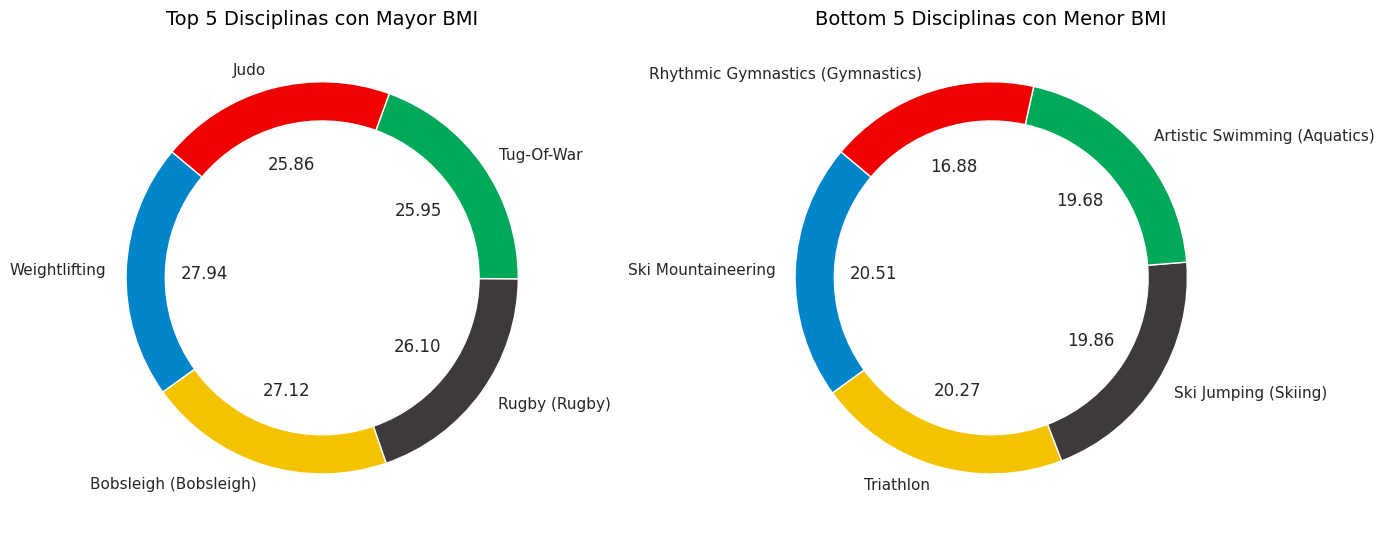

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#PREGUNTA 3

# Paso 1: Filtrar atletas con medalla y hacer una copia para evitar la advertencia
medalists_df = df3.dropna(subset=['medal', 'weight_kg', 'height_cm']).copy()

# Paso 2: Calcular el BMI para los atletas con medalla
medalists_df['BMI'] = medalists_df['weight_kg'] / (medalists_df['height_cm'] / 100) ** 2

# Paso 3: Calcular la media de BMI por disciplina (excluyendo NaN en BMI)
bmi_mean_per_discipline_medalists = medalists_df.groupby('discipline')['BMI'].mean().dropna().sort_values(ascending=False)

# Paso 4: Filtrar el top 5 con mayor BMI y el bottom 5 con menor BMI
top_5_bmi = bmi_mean_per_discipline_medalists.head(5)
bottom_5_bmi = bmi_mean_per_discipline_medalists.tail(5)

# Colores de los anillos olímpicos
olympic_colors = ['#0085CA', '#F4C300', '#3E3A3A', '#00A859', '#F10000']

# Función para personalizar el formato del BMI
def bmi_format(value):
    return f'{value:.2f}'

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Paso 5: Crear los gráficos de pastel (Pie chart) para el top 5 y bottom 5
plt.figure(figsize=(14, 8))

# Pie chart para las 5 disciplinas con mayor BMI (anillo)
plt.subplot(1, 2, 1)  # Subgráfico 1
wedges, texts, autotexts = plt.pie(
    top_5_bmi, 
    labels=top_5_bmi.index, 
    autopct='%1.1f%%',  # Esto se reemplaza con los BMI en el siguiente paso
    startangle=140, 
    colors=olympic_colors,
    wedgeprops={'width': 0.2}  # Esto hace que el gráfico sea un anillo más fino (width=0.2)
)

# Reemplazamos los porcentajes por los valores de BMI
for i, autotext in enumerate(autotexts):
    autotext.set_text(bmi_format(top_5_bmi.iloc[i]))  # Muestra el BMI en lugar del porcentaje



plt.title("Top 5 Disciplinas con Mayor BMI", fontsize=14, color='black')

# Pie chart para las 5 disciplinas con menor BMI (anillo)
plt.subplot(1, 2, 2)  # Subgráfico 2
wedges, texts, autotexts = plt.pie(
    bottom_5_bmi, 
    labels=bottom_5_bmi.index, 
    autopct='%1.1f%%',  # Esto se reemplaza con los BMI en el siguiente paso
    startangle=140, 
    colors=olympic_colors,
    wedgeprops={'width': 0.2}  # Esto hace que el gráfico sea un anillo más fino (width=0.2)
)

# Reemplazamos los porcentajes por los valores de BMI
for i, autotext in enumerate(autotexts):
    autotext.set_text(bmi_format(bottom_5_bmi.iloc[i]))  # Muestra el BMI en lugar del porcentaje


plt.title("Bottom 5 Disciplinas con Menor BMI", fontsize=14, color='black')

# Ajuste de layout para evitar que se solapen los títulos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [33]:
# Filtrar atletas con medallas
medalists_data = df3.dropna(subset=['medal'])

# Calcular la media de BMI para cada tipo de medalla por disciplina
bmi_by_medal_and_discipline = medalists_data.groupby(['discipline', 'medal'])['BMI'].mean().unstack()

# Filtrar únicamente las disciplinas y tipos de medalla con BMI no nulo
bmi_non_null = bmi_by_medal_and_discipline.dropna(how='all')

print(bmi_non_null)

medal                                Bronze       Gold     Silver
discipline                                                       
3-on-3 Ice Hockey (Ice Hockey)    21.677853  22.045987  23.453232
3x3 Basketball (Basketball)             NaN  25.013190        NaN
Alpine Skiing (Skiing)            24.142684  24.014079  23.930901
Archery                           23.847159  23.513580  23.458225
Artistic Gymnastics (Gymnastics)  21.014410  20.928173  20.952068
...                                     ...        ...        ...
Tug-Of-War                        25.951557        NaN  25.951557
Volleyball (Volleyball)           22.546159  22.876072  22.625210
Water Polo (Aquatics)             24.682709  24.715961  24.622274
Weightlifting                     27.821667  27.920579  28.078086
Wrestling                         25.453919  25.249822  25.169807

[71 rows x 3 columns]


/tmp/ipykernel_14253/1250120506.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_by_medal_and_discipline = medalists_data.groupby(['discipline', 'medal'])['BMI'].mean().unstack()


/tmp/ipykernel_14253/582511078.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gold_medal_counts = gold_medalists.groupby('noc').size()
/tmp/ipykernel_14253/582511078.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  silver_medal_counts = silver_medalists.groupby('noc').size()
/tmp/ipykernel_14253/582511078.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bronze_medal_counts = bronze_medalists.groupby('noc').

Top 3 países con más medallas de Oro desde 1992:
noc
USA    1146
GER     546
CHN     436
dtype: int64

Top 3 países con más medallas de Plata desde 1992:
noc
USA    812
GER    477
CHN    402
dtype: int64

Top 3 países con más medallas de Bronce desde 1992:
noc
USA    670
GER    511
AUS    436
dtype: int64


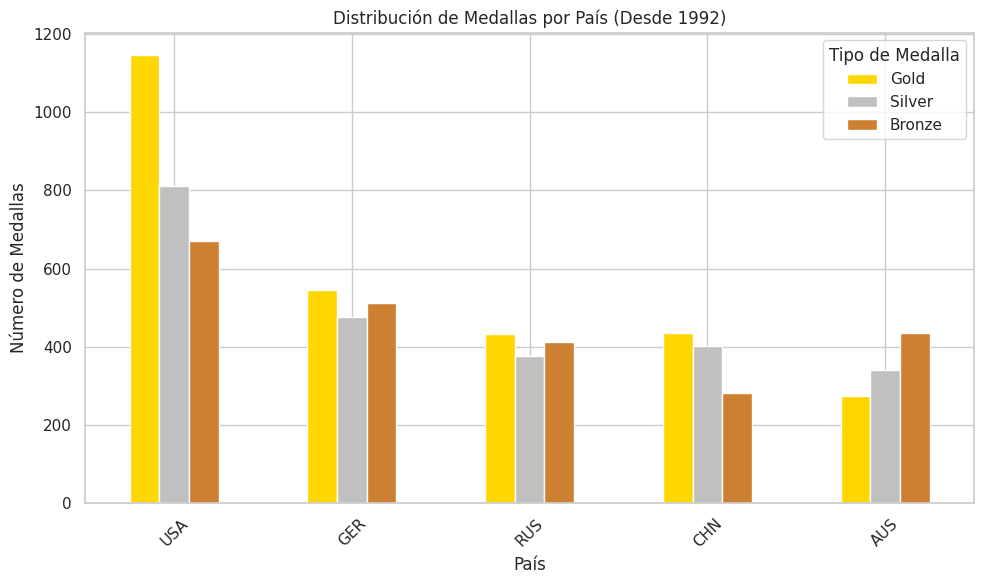

In [34]:
#Paso 1: Filtrar los datos para medallas ganadas a partir de 1992
df3_filtered = df3[df3['year'] >= 1992]

#Paso 2: Filtrar los datos para cada tipo de medalla (oro, plata, bronce)
gold_medalists = df3_filtered[df3_filtered['medal'] == 'Gold']
silver_medalists = df3_filtered[df3_filtered['medal'] == 'Silver']
bronze_medalists = df3_filtered[df3_filtered['medal'] == 'Bronze']

#Paso 3: Contar medallas por país para cada tipo
gold_medal_counts = gold_medalists.groupby('noc').size()
silver_medal_counts = silver_medalists.groupby('noc').size()
bronze_medal_counts = bronze_medalists.groupby('noc').size()

#Crear DataFrames para los top 3 de cada tipo de medalla
top3_gold = gold_medal_counts.sort_values(ascending=False).head(3)
top3_silver = silver_medal_counts.sort_values(ascending=False).head(3)
top3_bronze = bronze_medal_counts.sort_values(ascending=False).head(3)

#Mostrar el top 3 de cada medalla
print("Top 3 países con más medallas de Oro desde 1992:")
print(top3_gold)
print("\nTop 3 países con más medallas de Plata desde 1992:")
print(top3_silver)
print("\nTop 3 países con más medallas de Bronce desde 1992:")
print(top3_bronze)

#Paso 4: Unir los conteos en un solo DataFrame para facilitar la visualización
medal_counts = pd.DataFrame({
    'Gold': gold_medal_counts,
    'Silver': silver_medal_counts,
    'Bronze': bronze_medal_counts
}).fillna(0)

#Filtrar para mostrar solo los 5 países con más medallas en total
top_countries = medal_counts.sum(axis=1).sort_values(ascending=False).head(5).index
medal_counts_top5 = medal_counts.loc[top_countries]

#Paso 5: Crear gráfico de barras apiladas
medal_counts_top5.plot(kind='bar', stacked=False, color=['#FFD700', '#C0C0C0', '#CD7F32'], figsize=(10, 6))

#Personalizar el gráfico
plt.title("Distribución de Medallas por País (Desde 1992)")
plt.xlabel("País")
plt.ylabel("Número de Medallas")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Medalla')
plt.tight_layout()

#Mostrar el gráfico
plt.show()

/tmp/ipykernel_14253/3317972567.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gold_medal_counts = gold_medalists.groupby('noc').size()
/tmp/ipykernel_14253/3317972567.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  silver_medal_counts = silver_medalists.groupby('noc').size()
/tmp/ipykernel_14253/3317972567.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bronze_medal_counts = bronze_medalists.groupby('noc

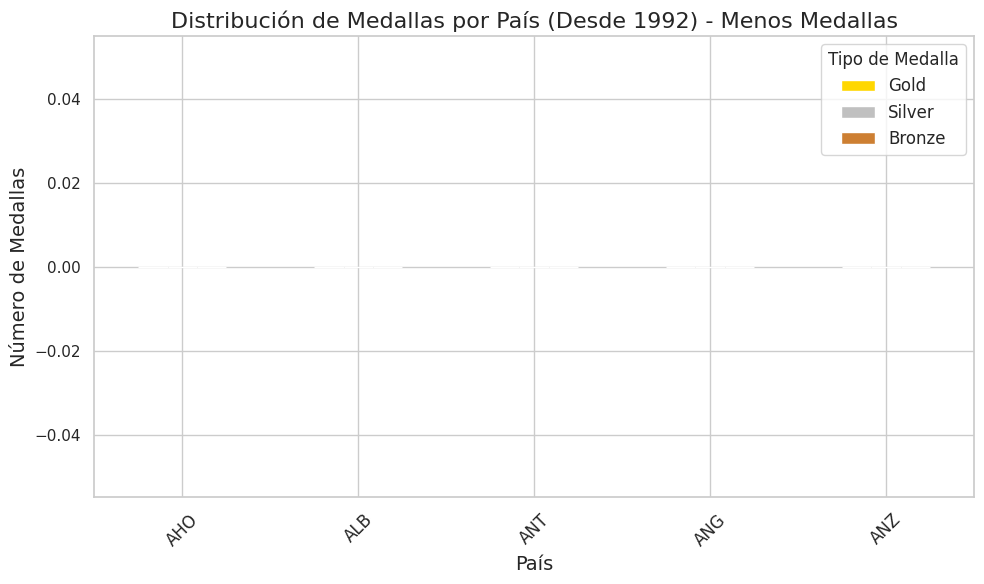

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Filtrar los datos para medallas ganadas a partir de 1992
df3_filtered = df3[df3['year'] >= 1992]

# Paso 2: Filtrar los datos para cada tipo de medalla (oro, plata, bronce)
gold_medalists = df3_filtered[df3_filtered['medal'] == 'Gold']
silver_medalists = df3_filtered[df3_filtered['medal'] == 'Silver']
bronze_medalists = df3_filtered[df3_filtered['medal'] == 'Bronze']

# Paso 3: Contar medallas por país para cada tipo
gold_medal_counts = gold_medalists.groupby('noc').size()
silver_medal_counts = silver_medalists.groupby('noc').size()
bronze_medal_counts = bronze_medalists.groupby('noc').size()

# Paso 4: Unir los conteos en un solo DataFrame para facilitar la visualización
medal_counts = pd.DataFrame({
    'Gold': gold_medal_counts,
    'Silver': silver_medal_counts,
    'Bronze': bronze_medal_counts
}).fillna(0)  # Usar 0 en lugar de NaN si no hay medallas de algún tipo

# Paso 5: Filtrar para mostrar solo los 5 países con menos medallas en total
bottom_countries = medal_counts.sum(axis=1).sort_values(ascending=True).head(5).index
medal_counts_bottom5 = medal_counts.loc[bottom_countries]

# Paso 6: Crear gráfico de barras apiladas
medal_counts_bottom5.plot(kind='bar', stacked=False, color=['#FFD700', '#C0C0C0', '#CD7F32'], figsize=(10, 6))

# Personalizar el gráfico
plt.title("Distribución de Medallas por País (Desde 1992) - Menos Medallas", fontsize=16)
plt.xlabel("País", fontsize=14)
plt.ylabel("Número de Medallas", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Tipo de Medalla', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/tmp/ipykernel_14253/1438929257.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gold_medal_counts = gold_medalists.groupby('noc').size().sort_values(ascending=False).head(5)
/tmp/ipykernel_14253/1438929257.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  silver_medal_counts = silver_medalists.groupby('noc').size().sort_values(ascending=False).head(5)
/tmp/ipykernel_14253/1438929257.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and s

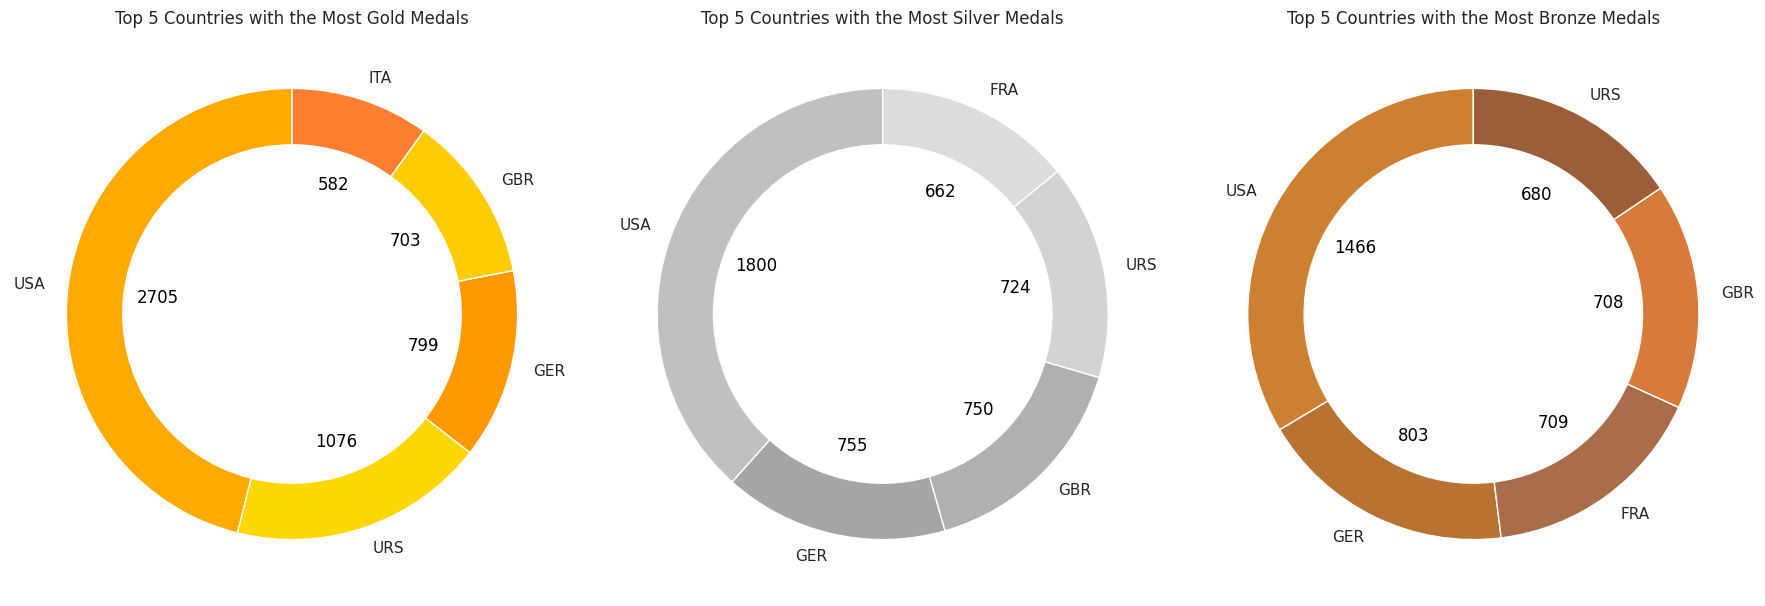

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Filtrar los datos para cada tipo de medalla (oro, plata, bronce)
gold_medalists = df3[df3['medal'] == 'Gold']
silver_medalists = df3[df3['medal'] == 'Silver']
bronze_medalists = df3[df3['medal'] == 'Bronze']

# Paso 2: Contar medallas por país para cada tipo
gold_medal_counts = gold_medalists.groupby('noc').size().sort_values(ascending=False).head(5)
silver_medal_counts = silver_medalists.groupby('noc').size().sort_values(ascending=False).head(5)
bronze_medal_counts = bronze_medalists.groupby('noc').size().sort_values(ascending=False).head(5)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Paso 3: Crear los pie charts (con efecto de anillo) con matplotlib, pero manteniendo el estilo Seaborn
plt.figure(figsize=(18, 6))  # Ajustamos el tamaño para que las gráficas se acomoden horizontalmente

# Gráfico para medallas de oro (más contraste)
plt.subplot(1, 3, 1)  # Cambiamos para que estén en una fila
wedges, texts, autotexts = plt.pie(gold_medal_counts, 
                                   labels=gold_medal_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=['#FFAA00', '#FFD700', '#FF9900', '#FFCC00', '#FF7F32'],  # Colores oro más contrastantes
                                   wedgeprops={'width': 0.25})  # Efecto anillo

# Reemplazar los porcentajes por los valores de medallas de oro
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{gold_medal_counts.iloc[i]}')

# Estilo de las letras dentro del gráfico
for i, autotext in enumerate(autotexts):
    if ['#FFAA00', '#FFD700', '#FF9900', '#FFCC00', '#FF7F32'][i] == '#FFD700':  # Si es el oro
        autotext.set_color('black')
    else:
        autotext.set_color('black')

plt.title("Top 5 Countries with the Most Gold Medals")
plt.ylabel('')

# Gráfico para medallas de plata (más contraste)
plt.subplot(1, 3, 2)  # Cambiamos para que estén en una fila
wedges, texts, autotexts = plt.pie(silver_medal_counts, 
                                   labels=silver_medal_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=['#C0C0C0', '#A5A5A5', '#B0B0B0', '#D3D3D3', '#DCDCDC'],  # Colores plata más contrastantes
                                   wedgeprops={'width': 0.25})  # Efecto anillo

# Reemplazar los porcentajes por los valores de medallas de plata
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{silver_medal_counts.iloc[i]}')

# Estilo de las letras dentro del gráfico
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')

plt.title("Top 5 Countries with the Most Silver Medals")
plt.ylabel('')

# Gráfico para medallas de bronce (más contraste)
plt.subplot(1, 3, 3)  # Cambiamos para que estén en una fila
wedges, texts, autotexts = plt.pie(bronze_medal_counts, 
                                   labels=bronze_medal_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=['#CD7F32', '#B87333', '#A96D49', '#D77B3A', '#9C5E39'],  # Colores bronce más contrastantes
                                   wedgeprops={'width': 0.25})  # Efecto anillo

# Reemplazar los porcentajes por los valores de medallas de bronce
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{bronze_medal_counts.iloc[i]}')

# Estilo de las letras dentro del gráfico
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')

plt.title("Top 5 Countries with the Most Bronze Medals")
plt.ylabel('')

# Ajuste de layout para evitar que se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


/tmp/ipykernel_14253/2631889004.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Girls': yog_girls.groupby('discipline')['BMI'].mean(),
/tmp/ipykernel_14253/2631889004.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Boys': yog_boys.groupby('discipline')['BMI'].mean(),
/tmp/ipykernel_14253/2631889004.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Mixed Youth': yog_mixed_youth.groupby('discipline')['BMI']

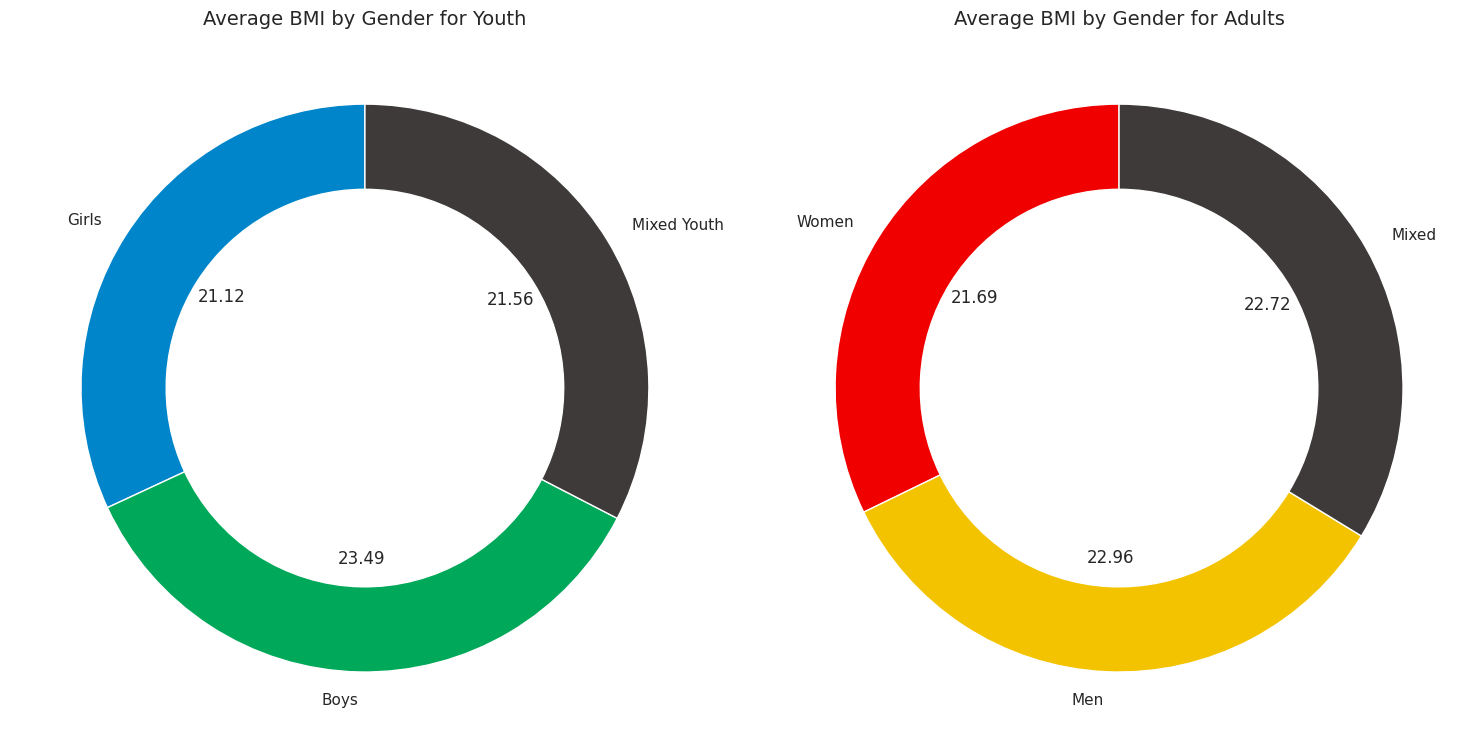

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

#PREGUNTA 3

# Paso 1: Filtrar atletas con medalla y hacer una copia para evitar la advertencia
medalists_df = df3.dropna(subset=['medal', 'weight_kg', 'height_cm']).copy()

# Paso 2: Calcular el BMI para los atletas con medalla
medalists_df['BMI'] = medalists_df['weight_kg'] / (medalists_df['height_cm'] / 100) ** 2

# Paso 3: Filtrar por eventos YOG y no YOG
yog_medalists = medalists_df[medalists_df['event'].str.contains('YOG', case=False, na=False)]
non_yog_medalists = medalists_df[~medalists_df['event'].str.contains('YOG', case=False, na=False)]

# Paso 4: Filtrar por géneros
# Para no YOG (mujeres, hombres, y mezclado)
non_yog_women = non_yog_medalists[non_yog_medalists['event'].str.contains('women', case=False, na=False)]
non_yog_men = non_yog_medalists[non_yog_medalists['event'].str.contains('men', case=False, na=False)]
non_yog_mixed = non_yog_medalists[non_yog_medalists['event'].str.contains('mixed', case=False, na=False)]

# Para YOG (chicas, chicos, y mixto juvenil)
yog_girls = yog_medalists[yog_medalists['event'].str.contains('girls', case=False, na=False)]
yog_boys = yog_medalists[yog_medalists['event'].str.contains('boys', case=False, na=False)]
yog_mixed_youth = yog_medalists[yog_medalists['event'].str.contains('mixed youth', case=False, na=False)]

# Paso 5: Calcular el BMI promedio por género en cada grupo (YOG y no YOG)
# Para YOG
yog_bmi_by_gender = {
    'Girls': yog_girls.groupby('discipline')['BMI'].mean(),
    'Boys': yog_boys.groupby('discipline')['BMI'].mean(),
    'Mixed Youth': yog_mixed_youth.groupby('discipline')['BMI'].mean()
}

# Para no YOG
non_yog_bmi_by_gender = {
    'Women': non_yog_women.groupby('discipline')['BMI'].mean(),
    'Men': non_yog_men.groupby('discipline')['BMI'].mean(),
    'Mixed': non_yog_mixed.groupby('discipline')['BMI'].mean()
}

# Convertir los resultados a DataFrame para que sea más fácil de trabajar
yog_bmi_by_gender_df = pd.DataFrame(yog_bmi_by_gender)
non_yog_bmi_by_gender_df = pd.DataFrame(non_yog_bmi_by_gender)

# Paso 6: Crear los gráficos de pie para YOG y no YOG con BMI en lugar de porcentaje
plt.figure(figsize=(15, 8))

# Gráfico de pie para el grupo YOG
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(
    yog_bmi_by_gender_df.mean(), 
    labels=yog_bmi_by_gender_df.columns, 
    startangle=90, 
    wedgeprops={'width': 0.3}, 
    colors=['#0085CA', '#00A859', '#3E3A3A'], 
    autopct='%1.1f%%'  # Esto se usa para tener el texto en el gráfico, pero lo vamos a modificar
)

# Reemplazamos los porcentajes por los BMI en el gráfico
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{yog_bmi_by_gender_df.mean().iloc[i]:.2f}')  # Muestra el BMI en lugar del porcentaje

plt.title("Average BMI by Gender for Youth", fontsize=14)
plt.ylabel('')

# Gráfico de pie para el grupo no YOG
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(
    non_yog_bmi_by_gender_df.mean(), 
    labels=non_yog_bmi_by_gender_df.columns, 
    startangle=90, 
    wedgeprops={'width': 0.3}, 
    colors=['#F10000', '#F4C300', '#3E3A3A'],
    autopct='%1.1f%%'  # Lo usamos para que se vean los textos, pero los reemplazamos por los BMI
)

# Reemplazamos los porcentajes por los BMI en el gráfico
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{non_yog_bmi_by_gender_df.mean().iloc[i]:.2f}')  # Muestra el BMI en lugar del porcentaje

plt.title("Average BMI by Gender for Adults", fontsize=14)
plt.ylabel('')

# Ajuste del diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


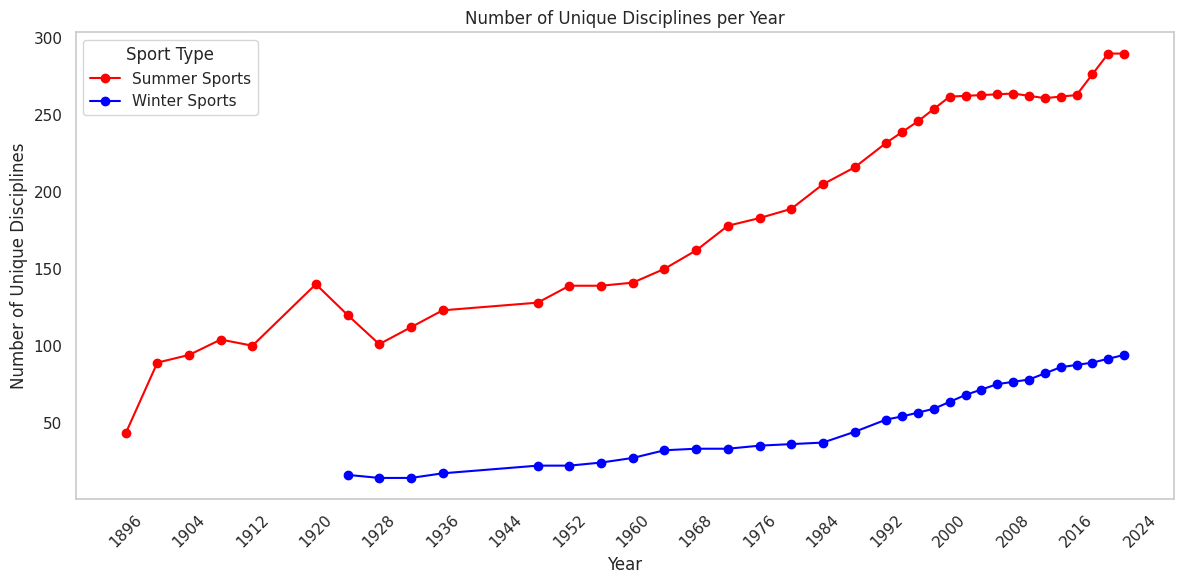

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#PREGUNTA 1

# Filtrar el DataFrame para incluir solo eventos que contengan "Olympic" en el nombre de la disciplina
df_filtered = df2[(df2['event'].str.contains("Olympic", case=False))]

# Contar disciplinas únicas por año y tipo en el DataFrame filtrado
unique_disciplines = df_filtered.groupby(['year', 'type'], observed=False)['event'].nunique().reset_index()

# Pivotar los datos para que cada tipo de deporte sea una columna
pivot_table = unique_disciplines.pivot(index='year', columns='type', values='event').fillna(0)

# Interpolamos los ceros (sólo los ceros, para que la línea continúe de manera fluida)
pivot_table = pivot_table.replace(0, float('nan')).interpolate(method='linear', axis=0)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index, pivot_table['Summer'], color='red', marker='o', label='Summer Sports')
plt.plot(pivot_table.index, pivot_table['Winter'], color='blue', marker='o', label='Winter Sports')

# Personalizar el gráfico
plt.title("Number of Unique Disciplines per Year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Disciplines")

# Ajustar las etiquetas del eje X para mostrar más años
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=20))  # Ajusta 'nbins' según la cantidad de etiquetas que desees

plt.legend(title='Sport Type')
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En esta representación gráfica se muestran la tendecia con respecto a la cantidad de discilinas deportivas desarrolladas a lo largo de la historia, tanto en deportes de verano como de invierno.
Cabe destacar un pequeño descenso de las mismas durante los años 20 del siglo pasado, aumentando de forma progresiva en las ediciones posteriores, llegando a una cierta estabilidad en los años 2000.
Como conclusion puede deducirse el constante descubrimiento de nuevas disciplinas a desarrollar.

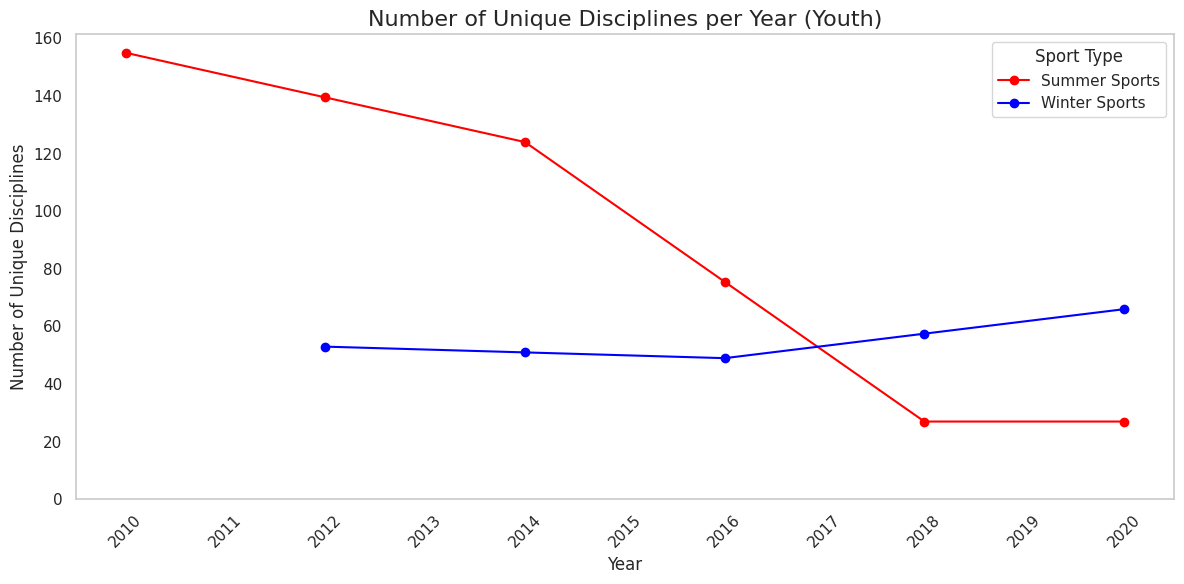

In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# PREGUNTA 1 - Tendencia del número de disciplinas por año (YOG)

# Filtrar el DataFrame para incluir solo eventos que contengan "YOG" en el nombre de la disciplina
df_filtered = df2[df2['event'].str.contains("YOG", case=False)]

# Contar disciplinas únicas por año y tipo en el DataFrame filtrado
unique_disciplines = df_filtered.groupby(['year', 'type'], observed=False)['event'].nunique().reset_index()

# Pivotar los datos para que cada tipo de deporte sea una columna
pivot_table = unique_disciplines.pivot(index='year', columns='type', values='event').fillna(0)

# Interpolamos los ceros (sólo los ceros, para que la línea continúe de manera fluida)
pivot_table = pivot_table.replace(0, float('nan')).interpolate(method='linear', axis=0)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index, pivot_table['Summer'], color='red', marker='o', label='Summer Sports')
plt.plot(pivot_table.index, pivot_table['Winter'], color='blue', marker='o', label='Winter Sports')

# Personalizar el gráfico
plt.title("Number of Unique Disciplines per Year (Youth)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Unique Disciplines", fontsize=12)

# Ajustar las etiquetas del eje X para mostrar más años
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=20))  # Ajusta 'nbins' según la cantidad de etiquetas que desees

# Establecer el límite inferior del eje Y a 0
plt.ylim(bottom=0)

plt.legend(title='Sport Type')
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La reducción de disciplinas en los Juegos Olímpicos para Jóvenes se debe a una combinación de factores, entre ellos la necesidad de adaptar el evento al público juvenil, la experimentación con deportes nuevos, limitaciones logísticas y la prioridad de la educación y el desarrollo de los atletas jóvenes. A medida que el evento evoluciona, el COI ajusta el número de disciplinas y deportes para garantizar una experiencia más centrada en los valores del olimpismo, la sostenibilidad y la viabilidad organizativa.

/tmp/ipykernel_14253/1738348492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).head(5)
/tmp/ipykernel_14253/1738348492.py:17: UserWarning: 
The palette list has fewer values (5) than needed (229) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/tmp/ipykernel_14253/1738348492.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')


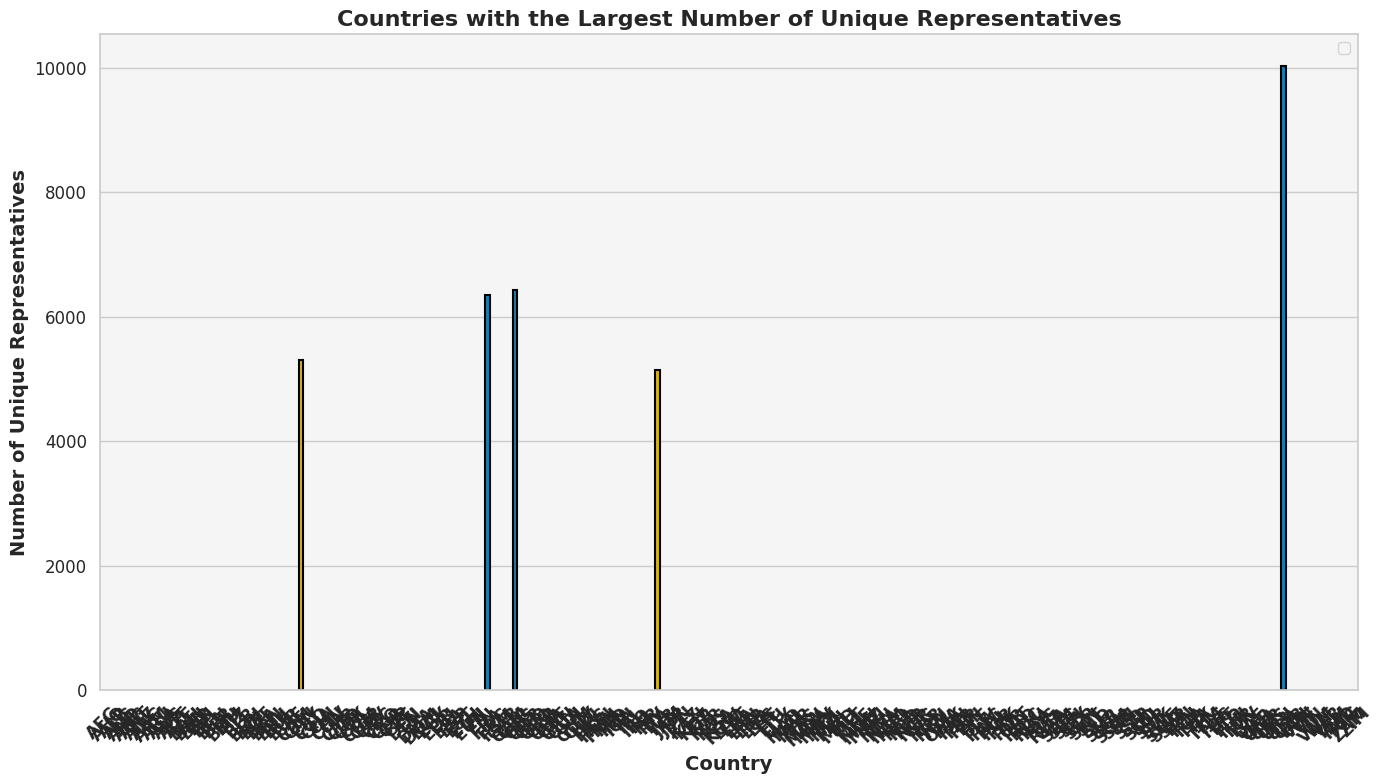

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#Custom color palette for Olympic colors
olympic_colors = ['#0085CA', '#F4C300', '#3E3A3A', '#00A859', '#F10000']

#Count the unique representatives by country
unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).head(5)

#Set the style for the plot
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

#Create a wider figure
plt.figure(figsize=(14, 8))

#Create the bar plot with additional styling
sns.barplot(
    x=unique_representatives.index,
    y=unique_representatives.values,
    hue=unique_representatives.index,
    palette=olympic_colors,
    dodge=False,
    edgecolor='black',  # Add edge color to bars
    linewidth=1.5
)

#Customize the plot
plt.title("Countries with the Largest Number of Unique Representatives", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=14, weight='bold')
plt.ylabel("Number of Unique Representatives", fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12, weight='bold')
plt.yticks(fontsize=12)

#Remove the legend title
plt.legend(title='')

#Show the plot with tight layout
plt.tight_layout()
plt.show()

/tmp/ipykernel_14253/2938951363.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).tail(5)
/tmp/ipykernel_14253/2938951363.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_14253/2938951363.py:12: UserWarning: 
The palette list has fewer values (5) than needed (229) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/tmp/ipykernel_14253/2938951363.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no 

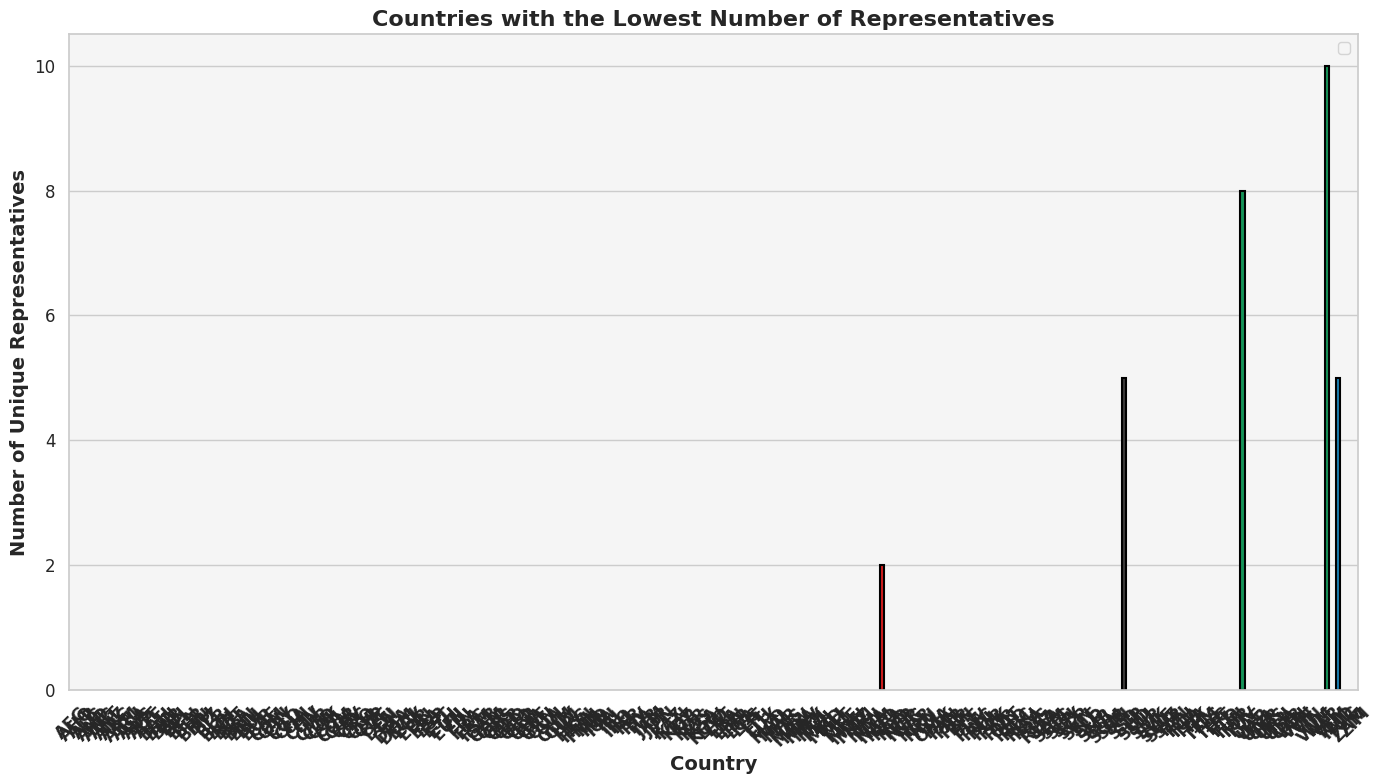

In [41]:
#Personalizar la paleta de colores para los países seleccionados
olympic_colors = ['#0085CA', '#F4C300', '#3E3A3A', '#00A859', '#F10000']

#Contar la cantidad de atletas únicos (representantes) por país, mostrando los 5 con menos representantes
unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).tail(5)

#Configurar el estilo del gráfico
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

#Crear el gráfico de barras con un tamaño más amplio y mejoras en el diseño
plt.figure(figsize=(14, 8))
sns.barplot(
    x=unique_representatives.index[::-1],  # Invertir el orden de los países
    y=unique_representatives.values[::-1],
    palette=olympic_colors,
    dodge=False,
    edgecolor='black',  # Agregar borde a las barras
    linewidth=1.5
)

#Personalizar el gráfico
plt.title("Countries with the Lowest Number of Representatives", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=14, weight='bold')
plt.ylabel("Number of Unique Representatives", fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12, weight='bold')
plt.yticks(fontsize=12)

#Remover el título de la leyenda
plt.legend(title='')

#Ajustar la presentación del gráfico
plt.tight_layout()
plt.show()

/tmp/ipykernel_14253/3674848611.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).head(5)
/tmp/ipykernel_14253/3674848611.py:16: UserWarning: 
The palette list has fewer values (5) than needed (229) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=unique_representatives.index, y=unique_representatives.values, hue=unique_representatives.index, palette=olympic_colors)


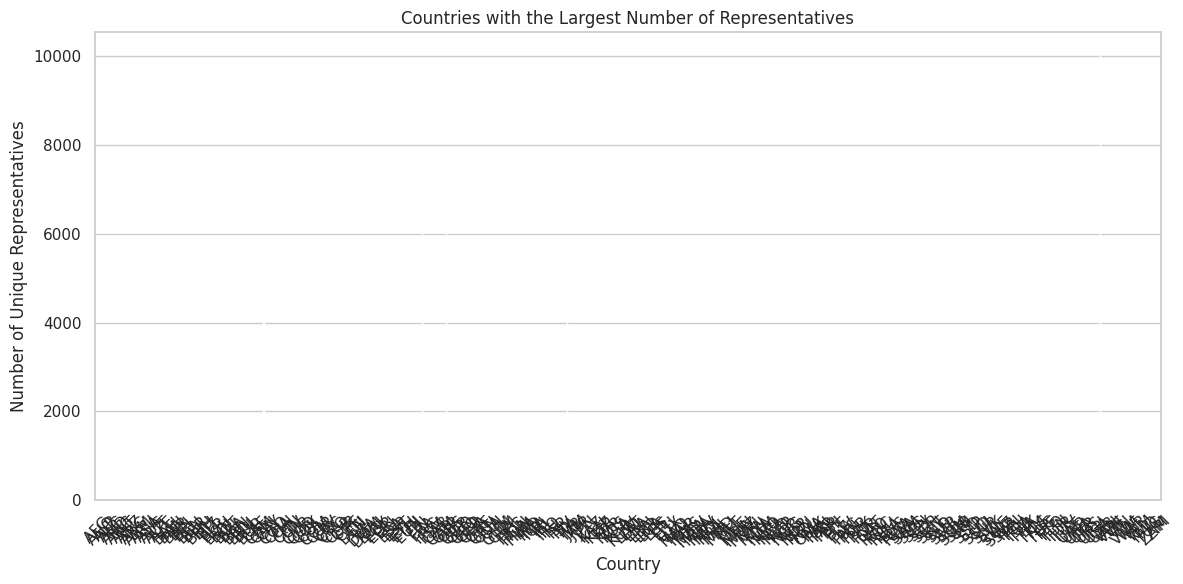

In [42]:
#PREGUNTA 1

import matplotlib.pyplot as plt
import seaborn as sns

# PREGUNTA 1

# Contar la cantidad de atletas únicos (representantes) por país
unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).head(5)

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_representatives.index, y=unique_representatives.values, hue=unique_representatives.index, palette=olympic_colors)

# Personalizar el gráfico
plt.title("Countries with the Largest Number of Representatives")
plt.xlabel("Country")
plt.ylabel("Number of Unique Representatives")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()


/tmp/ipykernel_14253/3835442492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).tail(5)
/tmp/ipykernel_14253/3835442492.py:15: UserWarning: 
The palette list has fewer values (5) than needed (229) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=unique_representatives.index, y=unique_representatives.values,


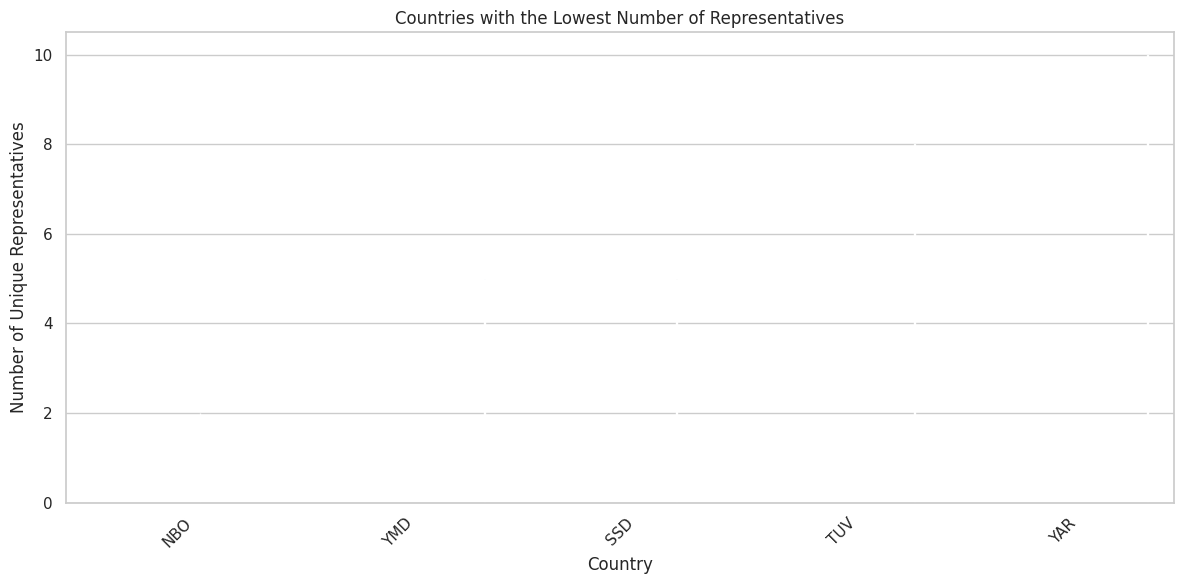

In [43]:
#PREGUNTA 1
import matplotlib.pyplot as plt
import seaborn as sns

# PREGUNTA 1

# Contar la cantidad de atletas únicos (representantes) por país
unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).tail(5)

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras, invirtiendo el orden de las barras
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_representatives.index, y=unique_representatives.values, 
            hue=unique_representatives.index, 
             palette=olympic_colors, order=unique_representatives.index[::-1])  # Invertir el orden con [::-1]

# Personalizar el gráfico
plt.title("Countries with the Lowest Number of Representatives")
plt.xlabel("Country")
plt.ylabel("Number of Unique Representatives")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()


/tmp/ipykernel_14253/1540174428.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  representatives_count = df_filtered.groupby('noc')['athlete_id'].nunique()
/tmp/ipykernel_14253/1540174428.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medals_count = df_filtered.groupby('noc')['medal'].count()


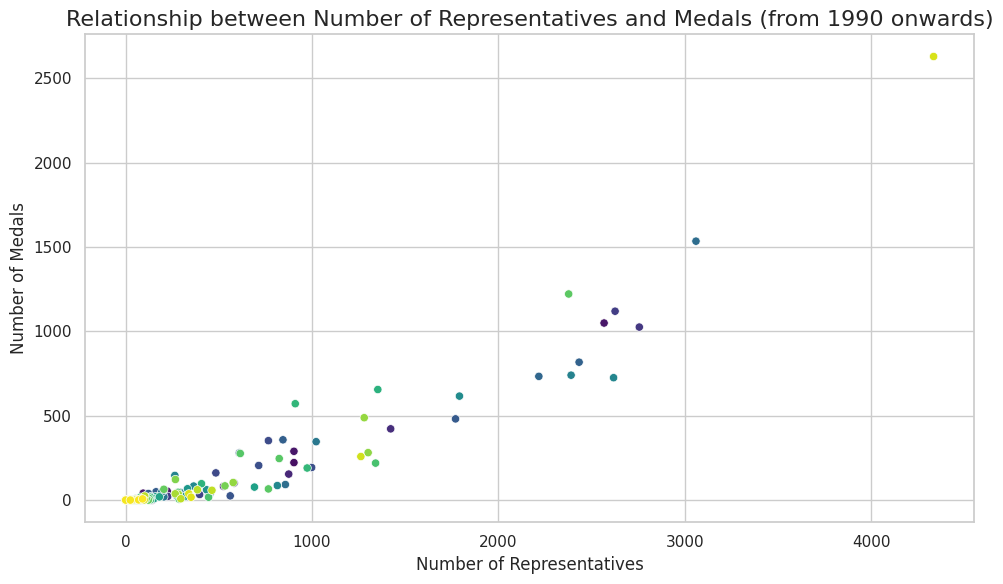

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos a partir del año 1990
df_filtered = df3[df3['year'] >= 1990]

# Contar los representantes únicos por país
representatives_count = df_filtered.groupby('noc')['athlete_id'].nunique()

# Contar el número de medallas ganadas por país (contando todos los tipos de medallas)
medals_count = df_filtered.groupby('noc')['medal'].count()

# Unir ambos conjuntos de datos
merged_data = pd.DataFrame({
    'representatives': representatives_count,
    'medals': medals_count
}).dropna()  # Eliminar filas con valores nulos

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['representatives'], y=merged_data['medals'], hue=merged_data.index, palette='viridis', legend=None)

# Personalizar el gráfico
plt.title("Relationship between Number of Representatives and Medals (from 1990 onwards)", fontsize=16)
plt.xlabel("Number of Representatives", fontsize=12)
plt.ylabel("Number of Medals", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [45]:

import pandas as pd

# Filtrar los datos a partir del año 1990
df_filtered = df3[df3['year'] >= 1990]

# Contar los representantes únicos por país
representatives_count = df_filtered.groupby('noc')['athlete_id'].nunique()

# Contar el número de medallas ganadas por país (contando todos los tipos de medallas)
medals_count = df_filtered.groupby('noc')['medal'].count()import matplotlib.pyplot as plt
import seaborn as sns

Custom color palette for Olympic colors
olympic_colors = ['#0085CA', '#F4C300', '#3E3A3A', '#00A859', '#F10000']

Count the unique representatives by country
unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).head(5)

Set the style for the plot
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

Create a wider figure
plt.figure(figsize=(14, 8))

Create the bar plot with additional styling
sns.barplot(
    x=unique_representatives.index,
    y=unique_representatives.values,
    hue=unique_representatives.index,
    palette=olympic_colors,
    dodge=False,
    edgecolor='black',  # Add edge color to bars
    linewidth=1.5
)

Customize the plot
plt.title("Countries with the Largest Number of Unique Representatives", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=14, weight='bold')
plt.ylabel("Number of Unique Representatives", fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12, weight='bold')
plt.yticks(fontsize=12)

Remove the legend title
plt.legend(title='')

Show the plot with tight layout
plt.tight_layout()
plt.show()

# Unir ambos conjuntos de datos
merged_data = pd.DataFrame({
    'representatives': representatives_count,
    'medals': medals_count
}).dropna()  # Eliminar filas con valores nulos

# Filtrar para mostrar solo países con más de 500 representantes
merged_data_filtered = merged_data[merged_data['representatives'] > 500]

# Crear el gráfico de dispersión interactivo con Plotly
fig = px.scatter(merged_data_filtered, 
                 x='representatives', 
                 y='medals', 
                 text=merged_data_filtered.index,  # Mostrar el nombre del país al pasar el ratón
                 labels={'representatives': 'Number of Representatives', 'medals': 'Number of Medals'},
                 title="Relationship between Number of Representatives and Medals (from 1990 onwards, > 500 Representatives)",
                 hover_name=merged_data_filtered.index)  # Mostrar el país en el hover

# Personalizar el gráfico
fig.update_traces(textposition='top center')  # Ajustar la posición del texto

# Mostrar el gráfico
fig.show()


SyntaxError: invalid syntax (1435779427.py, line 10)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos a partir del año 1990
df_filtered = df3[df3['year'] >= 1990]

# Contar los representantes únicos por país
representatives_count = df_filtered.groupby('noc')['athlete_id'].nunique()

# Contar el número de medallas ganadas por país (contando todos los tipos de medallas)
medals_count = df_filtered.groupby('noc')['medal'].count()

# Unir ambos conjuntos de datos
merged_data = pd.DataFrame({
    'representatives': representatives_count,
    'medals': medals_count
}).dropna()  # Eliminar filas con valores nulos

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión con un color uniforme para todos los puntos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['representatives'], y=merged_data['medals'], color='blue')  # Usar un color único (por ejemplo, azul)

# Personalizar el gráfico
plt.title("Relationship between Number of Representatives and Medals (from 1990 onwards)", fontsize=16)
plt.xlabel("Number of Representatives", fontsize=12)
plt.ylabel("Number of Medals", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [50]:
# Convertir los valores únicos a una lista
unique_nocs_list = df3['noc'].unique().tolist()

# Ver la lista de valores únicos
print(unique_nocs_list)


['FRA', 'GBR', 'FRG', 'GER', 'GHA', 'GRE', 'GUA', 'HAI', 'HKG', 'HUN', 'TKM', 'INA', 'AUT', 'NED', 'IND', 'ARG', 'AUS', 'BEL', 'BHU', 'BLR', 'BRA', 'BUL', 'CAN', 'CHN', 'COL', 'CRC', 'CYP', 'DEN', 'ESP', 'EST', 'FIN', 'EUN', 'GEO', 'USA', 'GUM', 'ARM', 'BAH', 'BER', 'BIH', 'URS', 'BOH', 'TCH', 'CHI', 'TPE', 'IRI', 'IRL', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KOR', 'KSA', 'KUW', 'LAT', 'LBA', 'LBN', 'LTU', 'LUX', 'MAD', 'MAR', 'MAS', 'MRI', 'MEX', 'NGR', 'NOR', 'NZL', 'PAK', 'PAR', 'PER', 'PHI', 'POL', 'BUR', 'CAF', 'CAM', 'CGO', 'EGY', 'CHA', 'CIV', 'CMR', 'COK', 'PUR', 'CUB', 'DOM', 'CRO', 'CZE', 'BEN', 'ECU', 'UAR', 'ESA', 'KAZ', 'KEN', 'MDA', 'MGL', 'MLT', 'MON', 'POR', 'PRK', 'ROU', 'RSA', 'RUS', 'SLO', 'SMR', 'SOL', 'SUI', 'SWE', 'THA', 'TUR', 'UKR', 'YUG', 'ZIM', 'ALG', 'QAT', 'SGP', 'SRI', 'SUD', 'SUR', 'SVK', 'TTO', 'TUN', 'UGA', 'URU', 'UZB', 'VEN', 'IOA', 'SCG', 'SRB', 'ETH', 'FIJ', 'GAB', 'NCA', 'AND', 'ANG', 'ANT', 'GUY', 'GDR', 'GRN', 'GUI', 'HON', 'ISV', 'KGZ'

In [53]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aquí se asume que 'df3' ya tiene los datos de las medallas y los códigos de país 'noc'
# Ejemplo de df3: Usa tu propio DataFrame df3 con los datos correctos
df3 = pd.DataFrame({
    'noc': ['USA', 'FRA', 'GBR', 'ESP', 'AUS', 'CAN', 'BRA', 'ARG', 'JPN', 'CHN', 'IND', 'GER', 'RUS', 'ITA', 'MEX'],
    'athlete_id': [100, 120, 130, 110, 125, 95, 100, 80, 90, 105, 98, 110, 112, 120, 115]
})

# Contar la cantidad de atletas únicos por país (código 'noc')
unique_representatives = df3.groupby('noc')['athlete_id'].nunique().sort_values(ascending=False).head(15)

# Crear un DataFrame con la información de los países y la cantidad de atletas
representatives_df = pd.DataFrame({
    'noc': unique_representatives.index,
    'representatives': unique_representatives.values
})

# Cargar el conjunto de datos de los países incorporados en GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Asegúrate de que las claves de país en 'noc' y 'iso_a3' están en mayúsculas (ya que puede haber diferencias de formato)
representatives_df['noc'] = representatives_df['noc'].str.upper()

# Unir el DataFrame con el GeoDataFrame usando la columna 'noc' y 'iso_a3' (código de país)
world['iso_a3'] = world['iso_a3'].str.upper()  # Asegurarse de que las claves estén en mayúsculas
merged = world.set_index('iso_a3').join(representatives_df.set_index('noc'))

# Filtrar para mantener solo los países con datos disponibles
merged = merged.dropna(subset=['representatives'])

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Crear un mapa con los datos fusionados
merged.plot(column='representatives', ax=ax, legend=True,
            legend_kwds={'label': "Number of Unique Representatives by Country",
                         'orientation': "horizontal"},
            cmap='viridis')

# Título del gráfico
plt.title("Number of Unique Representatives by Country (Top 15)", fontsize=16)

# Mostrar el gráfico
plt.show()


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.